In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress, pearsonr
%matplotlib inline
import matplotlib


In [2]:
#clean.csv data has been updated to include Distance to Hydrant and "CountyName"
master_data = "clean.csv"
master_data_df = pd.read_csv(master_data)

master_data_df

list(master_data_df) 

['Id',
 'OwnerCity',
 'OwnerState',
 'PropertyLocationStreet1',
 'PropertyCity',
 'PropertyZip',
 'CountyName',
 'StateParcelId',
 'ParcelSize',
 'ValueofHome',
 'YearBuilt',
 'TypeOfResidence',
 'NumberOfStories',
 'AdjSquareFeet',
 'Pool',
 'PPC',
 'BCEG',
 'DistancetoCoast',
 'PoliceID',
 'Crime',
 'FireID',
 'DistancetoHydrant',
 'DistancetoFireDepartment',
 'DistancetoSinkhole',
 'SinkholeLatitude',
 'SinkholeLongitude',
 'LocationWindSpeed',
 'WindborneDebrisRegion',
 'Terrain',
 'FloodZone',
 'FloodZoneRiskLevel']

In [3]:
#Accessibility to fire protection services

fire_master_df = master_data_df[["Id", "OwnerState", "PropertyCity", "PropertyZip", "CountyName", "PPC", "DistancetoHydrant", "FireID","DistancetoFireDepartment","ValueofHome"]]

fire_master_df



,Id,OwnerState,PropertyCity,PropertyZip,CountyName,PPC,DistancetoHydrant,FireID,DistancetoFireDepartment,ValueofHome
0,12009f31026acc440,NC,MELBOURNE,32940,BREVARD,NaN,NaN,NaN,1.67,360350.0
1,120112bfc77a87376,VA,MIRAMAR,33027,BROWARD,3,NaN,645.0,2.37,228680.0
2,12081776a04b281f4,VA,BRADENTON,34210,MANATEE,3,309.12,NaN,0.96,135000.0
3,12103fabafeea9fb7,VA,SAINT PETERSBURG,33701,PINELLAS,NaN,NaN,855.0,1.08,87660.0
4,120213b0f5f17e3d1,SC,NAPLES,34108,COLLIER,NaN,NaN,50.0,1.37,663090.0
...,...,...,...,...,...,...,...,...,...,...
223,12086e1ddd12521cd,SC,DORAL,33178,MIAMI-DADE,4,150.99,NaN,0.27,329160.0
224,120861813f1294d56,VA,MIAMI BEACH,33141,MIAMI-DADE,1,NaN,627.0,0.71,924061.0
225,12089ed366ee68b8e,NC,FERNANDINA BEACH,32034,NASSAU,3,NaN,359.0,1.23,274291.0
226,1211544028709F1DD,VA,SARASOTA,34242,SARASOTA,NaN,338.08,NaN,1.13,267400.0


In [4]:
#Analyses between PPC and home value.
#An ISO fire insurance rating, also referred to as a fire score or Public Protection Classification (PPC)
#PPC is a score from 1 to 10 that indicates how well-protected your community is by the fire department. 
#In the ISO rating scale, a lower number is better: 1 is the best rating, while 10 means the fire department did not meet the ISO's minimum requirements.

ppc_df = fire_master_df[["PPC", "ValueofHome"]]

#Clean up PPC DataFrame to exclude rows where PPC data is shown as nulls.
#Changed PPC data from object to integers.
ppc_df["PPC"] = pd.to_numeric(ppc_df["PPC"],errors='coerce')
clean_ppc_df = ppc_df.dropna()


clean_ppc_df

/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,PPC,ValueofHome
1,3.0,228680.0
2,3.0,135000.0
5,2.0,298880.0
6,2.0,141668.0
7,2.0,161169.0
...,...,...
220,2.0,151500.0
221,4.0,203651.0
223,4.0,329160.0
224,1.0,924061.0


In [5]:
clean_ppc_df.dtypes  

PPC            float64
ValueofHome    float64
dtype: object

The correlation between PPC and home value is 0.06, indicating NO correlation.
The linear regression equation between PPC and Value of Home is y = 8231.3x + 234317.03.
The r-squared is: 0.003398081842361495


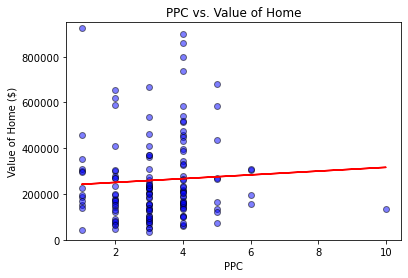

<Figure size 432x288 with 0 Axes>

In [6]:
#Correlation between PPC rating & value of home.
PPC = clean_ppc_df["PPC"]
Value = clean_ppc_df["ValueofHome"]

correlation = st.pearsonr(PPC, Value)

scatter1 = plt.scatter(PPC, Value, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope, intercept, rvalue, pvalue, stderr) = linregress(PPC, Value)

regress_values = PPC * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between PPC and home value is {round(correlation[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between PPC and Value of Home is {line_eq}.")
print(f"The r-squared is: {rvalue**2}")
plt.plot(PPC,regress_values,"r-")
plt.title("PPC vs. Value of Home")
plt.ylabel("Value of Home ($)")
plt.xlabel("PPC")
plt.ylim(0, 10)
plt.ylim(0, 950000)
plt.show()
plt.tight_layout()

In [7]:
#Analyses between distance to fire hydrant & value of home.
hydrant_df = fire_master_df[["DistancetoHydrant", "ValueofHome"]]

#Clean up hydrant DataFrame to exclude rows where distance data is shown as nulls.
clean_hydrant_df = hydrant_df.dropna()

clean_hydrant_df

,DistancetoHydrant,ValueofHome
2,309.12,135000.0
15,280.90,152459.0
16,933.54,88850.0
17,200.14,77100.0
21,366.00,155519.0
...,...,...
219,228.86,91800.0
221,120.89,203651.0
223,150.99,329160.0
226,338.08,267400.0


In [8]:
clean_hydrant_df.dtypes

DistancetoHydrant    float64
ValueofHome          float64
dtype: object

The correlation between distance to fire hydrant and home value is -0.06, indicating NO correlation.
The linear regression equation between distance to hydrant and home value is y = -33.24x + 199890.33.
The r-squared is: 0.0033293792916774074


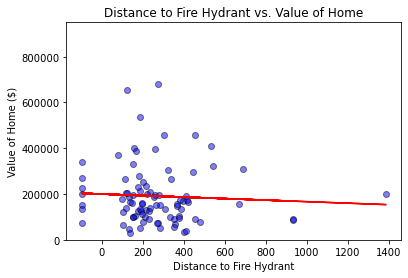

<Figure size 432x288 with 0 Axes>

In [9]:
#Correlation between distance to fire hydrant & value of home.
hydrant_dist = clean_hydrant_df["DistancetoHydrant"]
Value2 = clean_hydrant_df["ValueofHome"]

correlation2 = st.pearsonr(hydrant_dist, Value2)

scatter2 = plt.scatter(hydrant_dist, Value2, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(hydrant_dist, Value2)

regress_values2 = hydrant_dist * slope2 + intercept2

line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))

print(f"The correlation between distance to fire hydrant and home value is {round(correlation2[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between distance to hydrant and home value is {line_eq2}.")
print(f"The r-squared is: {rvalue2**2}")
plt.plot(hydrant_dist,regress_values2,"r-")

plt.title("Distance to Fire Hydrant vs. Value of Home")
plt.ylabel("Value of Home ($)")
plt.xlabel("Distance to Fire Hydrant")
plt.ylim(0, 1400)
plt.ylim(0, 950000)
plt.show()
plt.tight_layout()


In [10]:
#Analysis between distance to fire station & value of home.
firestation_df = fire_master_df[["DistancetoFireDepartment", "ValueofHome"]]

#Clean up firestation DataFrame to exclude rows where distance data is shown as nulls.
clean_firestation_df = firestation_df.dropna()

clean_firestation_df

,DistancetoFireDepartment,ValueofHome
0,1.67,360350.0
1,2.37,228680.0
2,0.96,135000.0
3,1.08,87660.0
4,1.37,663090.0
...,...,...
223,0.27,329160.0
224,0.71,924061.0
225,1.23,274291.0
226,1.13,267400.0


In [11]:
clean_firestation_df.dtypes

DistancetoFireDepartment    float64
ValueofHome                 float64
dtype: object

The correlation between distance to fire station and home value is 0.08, indicating NO correlation.
The linear regression equation between distance to firestation and home value is y = 22261.21x + 225239.76.
The r-squared is: 0.0063407604424575255


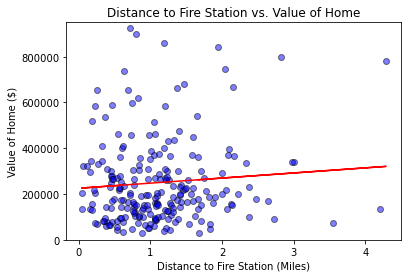

<Figure size 432x288 with 0 Axes>

In [12]:
#Correlation between distance to fire station & value of home.
firestation_dist = clean_firestation_df["DistancetoFireDepartment"]
Value3 = clean_firestation_df["ValueofHome"]

correlation3 = st.pearsonr(firestation_dist, Value3)

scatter3 = plt.scatter(firestation_dist, Value3, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(firestation_dist, Value3)

regress_values3 = firestation_dist * slope3 + intercept3

line_eq3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))

print(f"The correlation between distance to fire station and home value is {round(correlation3[0],2)}, indicating NO correlation.")
print(f"The linear regression equation between distance to firestation and home value is {line_eq3}.")
print(f"The r-squared is: {rvalue3**2}")

plt.plot(firestation_dist,regress_values3,"r-")
plt.title("Distance to Fire Station vs. Value of Home")
plt.ylabel("Value of Home ($)")
plt.xlabel("Distance to Fire Station (Miles)")
plt.ylim(0, 1400)
plt.ylim(0, 950000)
plt.show()
plt.tight_layout()

In [13]:
# PPC Focus: What are the typical PPC ratings of homes owned by NC, SC and VA residents?
ppc_master_df = fire_master_df[["Id", "PropertyCity", "PropertyZip", "CountyName", "PPC", "ValueofHome"]]

#Changed PPC data from object to integers.
#Clean up PPC DataFrame to exclude rows where PPC data is shown as nulls.
ppc_master_df["PPC"] = pd.to_numeric(ppc_master_df["PPC"],errors='coerce')
clean_ppc_master_df = ppc_master_df.dropna()

clean_ppc_master_df

#ppc_groups_df = clean_ppc_master_df.groupby(["PPC","CountyName"])
ppc_only_df = clean_ppc_master_df[["PPC", "Id"]]
ppc_groups = ppc_only_df.groupby(["PPC"])
ppc_count = ppc_groups["Id"].count()

ppc_count

/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


PPC
1.0     13
2.0     26
3.0     41
4.0     43
5.0      9
6.0      4
10.0     1
Name: Id, dtype: int64

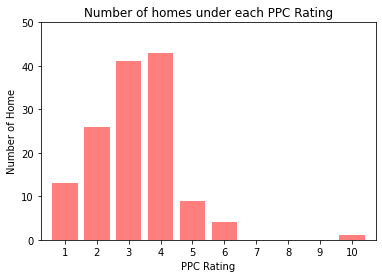

<Figure size 432x288 with 0 Axes>

In [14]:
#Create a bar graph showing numbers of home that fall under each PPC rating.

PPC_Ratings = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
Home_Numbers = [13, 26, 41, 43, 9, 4, 0, 0, 0, 1]

x_axis = np.arange(len(PPC_Ratings))
plt.bar(x_axis, Home_Numbers, color="r", alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, PPC_Ratings)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 50)
plt.title("Number of homes under each PPC Rating")
plt.xlabel("PPC Rating")
plt.ylabel("Number of Home")
plt.show()
plt.tight_layout()

NC, SC and VA residents buy homes in 22 counties in FL, including ['BROWARD' 'MANATEE' 'PINELLAS' 'BREVARD' 'MIAMI-DADE' 'PALM BEACH'
 'SARASOTA' 'CHARLOTTE' 'DUVAL' 'COLLIER' 'LEE' 'SEMINOLE' 'MARION'
 'VOLUSIA' 'SAINT JOHNS' 'BAY' 'HILLSBOROUGH' 'ALACHUA' 'INDIAN RIVER'
 'ESCAMBIA' 'NASSAU' 'ORANGE' 'MONROE'].


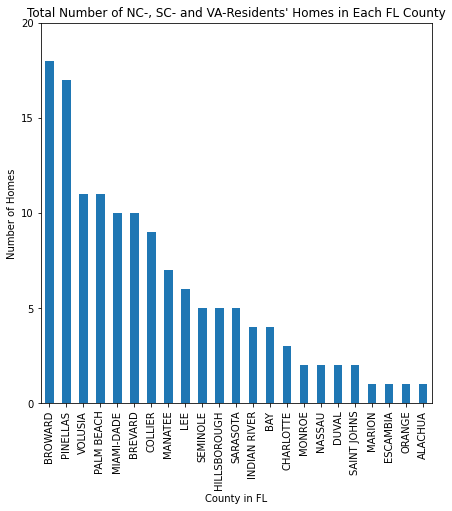

<Figure size 432x288 with 0 Axes>

In [15]:
# PPC Focus: Amongst the counties that NC, SC and VA residents have a vacation home, which
# ones have the higher PPC ratings?

# Which counties have NC, SC and VA-residents purchased their homes? 
county_list = clean_ppc_master_df["CountyName"].unique()
print(f"NC, SC and VA residents buy homes in 22 counties in FL, including {county_list}.")

county_only_df = clean_ppc_master_df[["CountyName", "Id"]]
county_groups = county_only_df.groupby(["CountyName"])
county_count = county_groups["Id"].count()
county_count = county_count.sort_values(ascending=False)
county_count_plot = county_count.plot(kind="bar", figsize=(7,7))

plt.title("Total Number of NC-, SC- and VA-Residents' Homes in Each FL County")
plt.ylabel("Number of Homes")
plt.xlabel("County in FL")
plt.ylim(0, 20)
plt.yticks(np.arange(0, 25, 5))
plt.show()
plt.tight_layout()

In [16]:
# Get PPC data from each county that NC, SC, and VA residents have a second home?
#'BROWARD' 'MANATEE' 'PINELLAS' 'BREVARD' 'MIAMI-DADE' 'PALM BEACH'
# 'SARASOTA' 'CHARLOTTE' 'DUVAL' 'COLLIER' 'LEE' 'SEMINOLE' 'MARION'
# 'VOLUSIA' 'SAINT JOHNS' 'BAY' 'HILLSBOROUGH' 'ALACHUA' 'INDIAN RIVER'
# 'ESCAMBIA' 'NASSAU' 'ORANGE' 'MONROE'

file = 'House_price_multifeatures.csv'
df = pd.read_csv(file)
county_PPC_df = df[["Id", "CountyName", "PPC", "ValueofHome"]]

#Drop duplicates from all homes in original dataset.
county_PPC_df = county_PPC_df.drop_duplicates(subset=['Id'])
#Changed PPC and Value of Home data from object to integers.
#Clean up original dataset to exclude rows where PPC data is shown as nulls.
county_PPC_df["PPC"] = pd.to_numeric(county_PPC_df["PPC"],errors='coerce')
county_PPC_df["ValueofHome"] = pd.to_numeric(county_PPC_df["ValueofHome"],errors='coerce')
county_PPC_df = county_PPC_df.dropna()

BROWARD_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "BROWARD"), :]
MANATEE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MANATEE"), :]
PINELLAS_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "PINELLAS"), :]
BREVARD_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "BREVARD"), :]
MIAMI_DADE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MIAMI-DADE"), :]
PALM_BEACH_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "PALM BEACH"), :]
SARASOTA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "SARASOTA"), :]
CHARLOTTE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "CHARLOTTE"), :]
DUVAL_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "DUVAL"), :]
COLLIER_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "COLLIER"), :]
LEE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "LEE"), :]
SEMINOLE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "SEMINOLE"), :]
MARION_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MARION"), :]
VOLUSIA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "VOLUSIA"), :]
SAINT_JOHNS_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "SAINT JOHNS"), :]
BAY_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "BAY"), :]
HILLSBOROUGH_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "HILLSBOROUGH"), :]
ALACHUA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "ALACHUA"), :]
INDIAN_RIVER_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "INDIAN RIVER"), :]
ESCAMBIA_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "ESCAMBIA"), :]
NASSAU_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "NASSAU"), :]
ORANGE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "ORANGE"), :]
MONROE_PPC_df = county_PPC_df.loc[(county_PPC_df["CountyName"] == "MONROE"), :]

favcounty_final = pd.merge(BROWARD_PPC_df, MANATEE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, PINELLAS_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, BREVARD_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, MIAMI_DADE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, PALM_BEACH_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, SARASOTA_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, CHARLOTTE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, DUVAL_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, COLLIER_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, LEE_PPC_df , how = "outer")
favcounty_final = pd.merge(favcounty_final, SEMINOLE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, MARION_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, VOLUSIA_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, SAINT_JOHNS_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, BAY_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, HILLSBOROUGH_PPC_df , how = "outer")
favcounty_final = pd.merge(favcounty_final, ALACHUA_PPC_df , how = "outer")
favcounty_final = pd.merge(favcounty_final, INDIAN_RIVER_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, ESCAMBIA_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, NASSAU_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, ORANGE_PPC_df, how = "outer")
favcounty_final = pd.merge(favcounty_final, MONROE_PPC_df, how = "outer")

favcounty_final2= favcounty_final.dropna(subset=["PPC"])

county_gp = favcounty_final2.groupby(["CountyName"])
county_home = county_gp["Id"].count()
county_PPC = county_gp["PPC"].mean()
county_value = county_gp["ValueofHome"].mean()

vacation_gp = clean_ppc_master_df.groupby(["CountyName"])
vacation_home = vacation_gp["Id"].count()
vacation_PPC = vacation_gp["PPC"].mean()
vacation_value = vacation_gp["ValueofHome"].mean()

summary_df = pd.DataFrame(county_home)
summary_df["Avg. PPC Rating (County)"] = round(county_PPC,2)
summary_df["Avg. Home Value (County)"] = round(county_value,2)
summary_df["Total Vacation Homes"] = vacation_home
summary_df["Avg. PPC Rating (Vacation Homes)"] = round(vacation_PPC,2)
summary_df["Avg. Home Value (Vacation Homes)"] = round(vacation_value,2)

summary_df


/Users/ajwu/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Avg. PPC Rating (County),Avg. Home Value (County),Total Vacation Homes,Avg. PPC Rating (Vacation Homes),Avg. Home Value (Vacation Homes)
CountyName,,,,,,
ALACHUA,132,3.34,147825.00,1,3.00,140100.00
BAY,222,5.14,164216.24,4,5.50,218045.75
BREVARD,1127,3.99,189255.78,10,4.10,336082.00
BROWARD,10073,2.05,251461.10,18,2.39,281956.11
CHARLOTTE,355,4.34,158553.65,3,4.00,161067.33
COLLIER,1149,3.56,419967.88,9,3.22,505801.00
DUVAL,226,2.85,184162.32,2,3.00,138761.00
ESCAMBIA,100,3.33,139806.49,1,2.00,234052.00
HILLSBOROUGH,1497,3.55,189447.63,5,3.80,120123.80
